<a href="https://colab.research.google.com/github/MerveCirak1930/EfficientAd-AnomalyDetection-Mvtec/blob/main/anomalib_EfficientAd_mvtecad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Anomaly Detection: EfficientAD model, Mvtec dataset

In [2]:
%pip install anomalib

In [4]:
pip install lightning

In [5]:
pip install kornia

In [6]:
!pip install --upgrade anomalib

In [7]:
import anomalib.data as ad

# anomalib.data modülü içinde tanımlı olan tüm alt sınıfları, fonksiyonları, objeleri ve alt modülleri listeler.
print(dir(ad))

['AnomalibDataModule', 'AnomalibDataset', 'Avenue', 'AvenueDataset', 'BTech', 'BTechDataset', 'Batch', 'DataFormat', 'DatasetItem', 'Datumaro', 'DatumaroDataset', 'DepthBatch', 'DepthDataFormat', 'DepthItem', 'DictConfig', 'Enum', 'Folder', 'Folder3D', 'Folder3DDataset', 'FolderDataset', 'ImageBatch', 'ImageDataFormat', 'ImageItem', 'InferenceBatch', 'Kolektor', 'KolektorDataset', 'ListConfig', 'MVTec', 'MVTec3D', 'MVTec3DDataset', 'MVTecAD', 'MVTecADDataset', 'NumpyImageBatch', 'NumpyImageItem', 'NumpyVideoBatch', 'NumpyVideoItem', 'PredictDataset', 'ShanghaiTech', 'ShanghaiTechDataset', 'UCSDped', 'UCSDpedDataset', 'UnknownDatamoduleError', 'VideoBatch', 'VideoDataFormat', 'VideoItem', 'Visa', 'VisaDataset', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'chain', 'dataclasses', 'datamodules', 'datasets', 'errors', 'get_datamodule', 'importlib', 'logger', 'logging', 'predict', 'to_tuple', 'transforms', '

- ImageNet veri seti, Anomalib içinde hazır bir DataModule veya Dataset sınıfı olarak yer almıyor.

- Yani MVTecAD Dataset gibi doğrudan çağırabileceğin bir ImageNetDataset tanımı yok.

- Çünkü ImageNet genelde sınıflandırma problemleri için kullanılır; anomalib ise anomali tespiti problemlerine odaklanır.

In [8]:
from pathlib import Path

# NOTE: Provide the path to the dataset root directory.
#   If the datasets is not downloaded, it will be downloaded
#   to this directory.
dataset_root = Path.cwd().parent.parent.parent / "datasets" / "MVTecAD"

In [9]:
# import shutil

# # 2. Check if the directory exists and delete it if it does
# if dataset_root.exists() and dataset_root.is_dir():
#     shutil.rmtree(dataset_root)
#     print(f"Deleted existing dataset directory: {dataset_root}")
# else:
#     print(f"Dataset directory not found: {dataset_root}")

In [10]:
import numpy as np
from PIL import Image
from torchvision.transforms.v2.functional import to_pil_image

from anomalib.data import MVTecAD, MVTecADDataset

In [11]:
datamodule = MVTecAD(
    root=dataset_root,
    category="bottle",
    train_batch_size=1, # 32 hata verdi
    eval_batch_size=32,
    num_workers=0,
)

In [12]:
datamodule.prepare_data()
datamodule.setup()

In [13]:
# Train images
i, data = next(enumerate(datamodule.train_dataloader()))
print(data.image.shape)

torch.Size([1, 3, 900, 900])


In [14]:
# Test images
i, data = next(enumerate(datamodule.test_dataloader()))
print(data.image.shape, data.gt_mask.shape)

torch.Size([32, 3, 900, 900]) torch.Size([32, 900, 900])


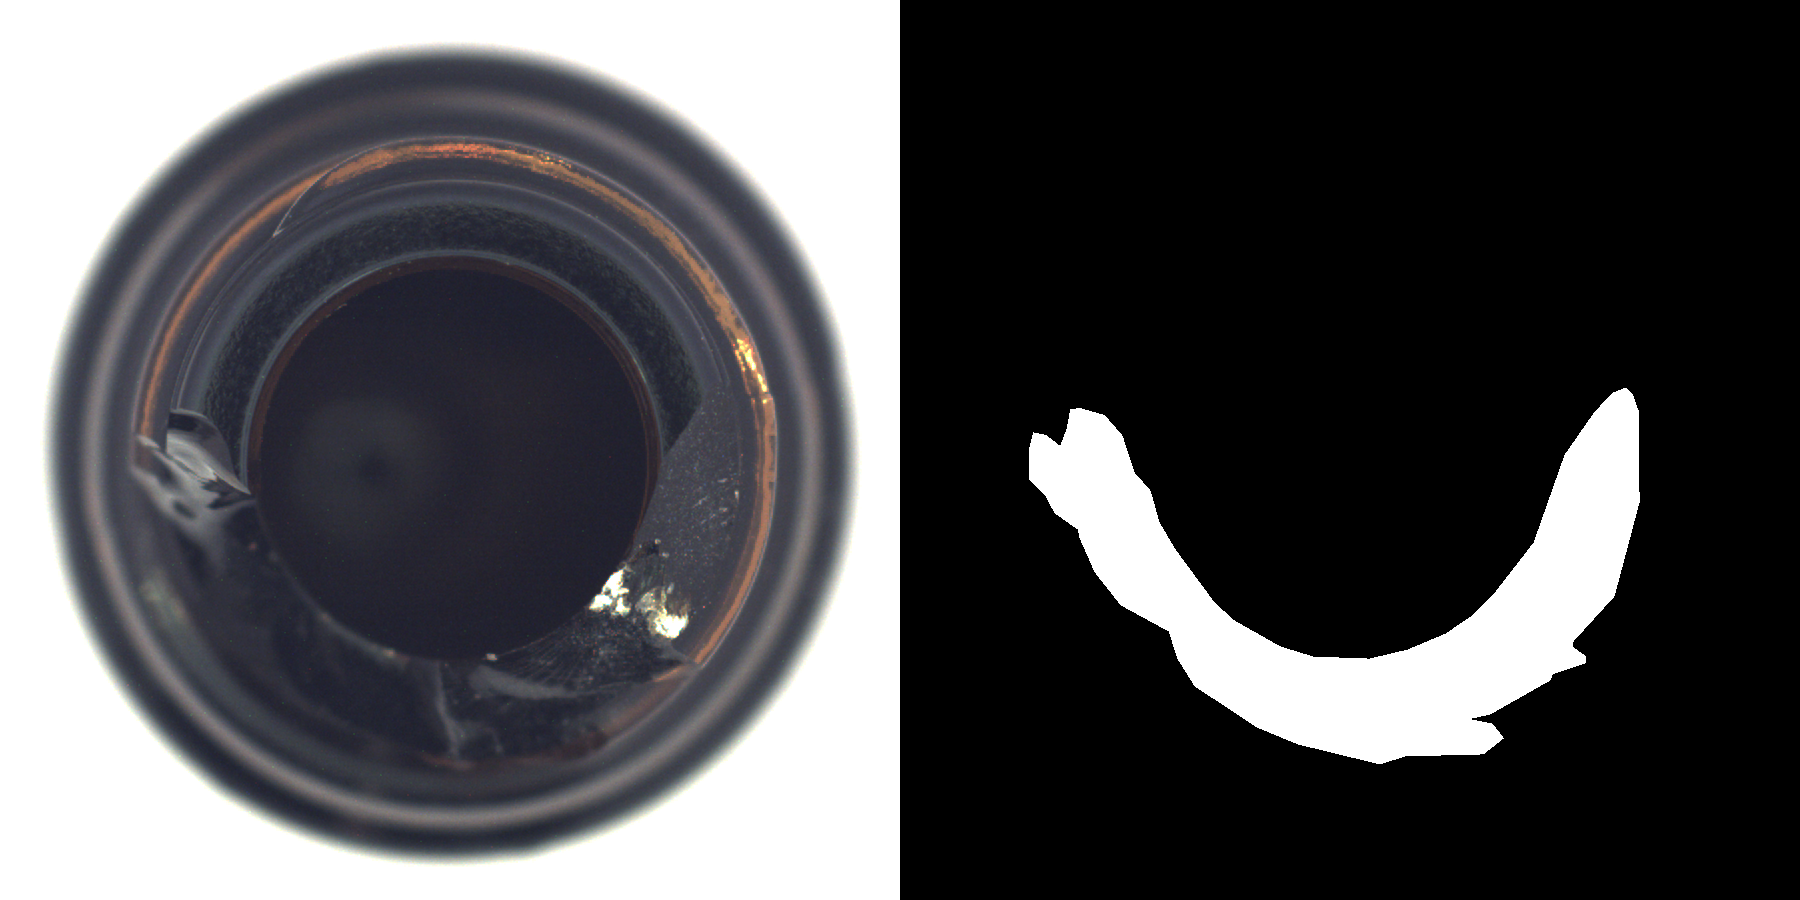

In [15]:
img = to_pil_image(data.image[1].clone())
msk = to_pil_image(data.gt_mask[1].int() * 255).convert("RGB")

Image.fromarray(np.hstack((np.array(img), np.array(msk))))

In [16]:
# MVTec dataset
mvtec_dataset_train = MVTecADDataset(
    root=dataset_root,
    category="bottle",
    split="train",
)
print(len(mvtec_dataset_train))
sample = mvtec_dataset_train[1]
print(sample.image.shape, sample.image_path, sample.gt_label)

209
torch.Size([3, 900, 900]) /datasets/MVTecAD/bottle/train/good/000.png tensor(False)


In [17]:
# MVTec Classification Test Set
mvtec_dataset_test = MVTecADDataset(
    root=dataset_root,
    category="bottle",
    split="test",
)
print(len(mvtec_dataset_test))
sample = mvtec_dataset_test[1]
print(sample.image.shape, sample.image_path, sample.gt_label)

83
torch.Size([3, 900, 900]) /datasets/MVTecAD/bottle/test/broken_large/001.png tensor(True)


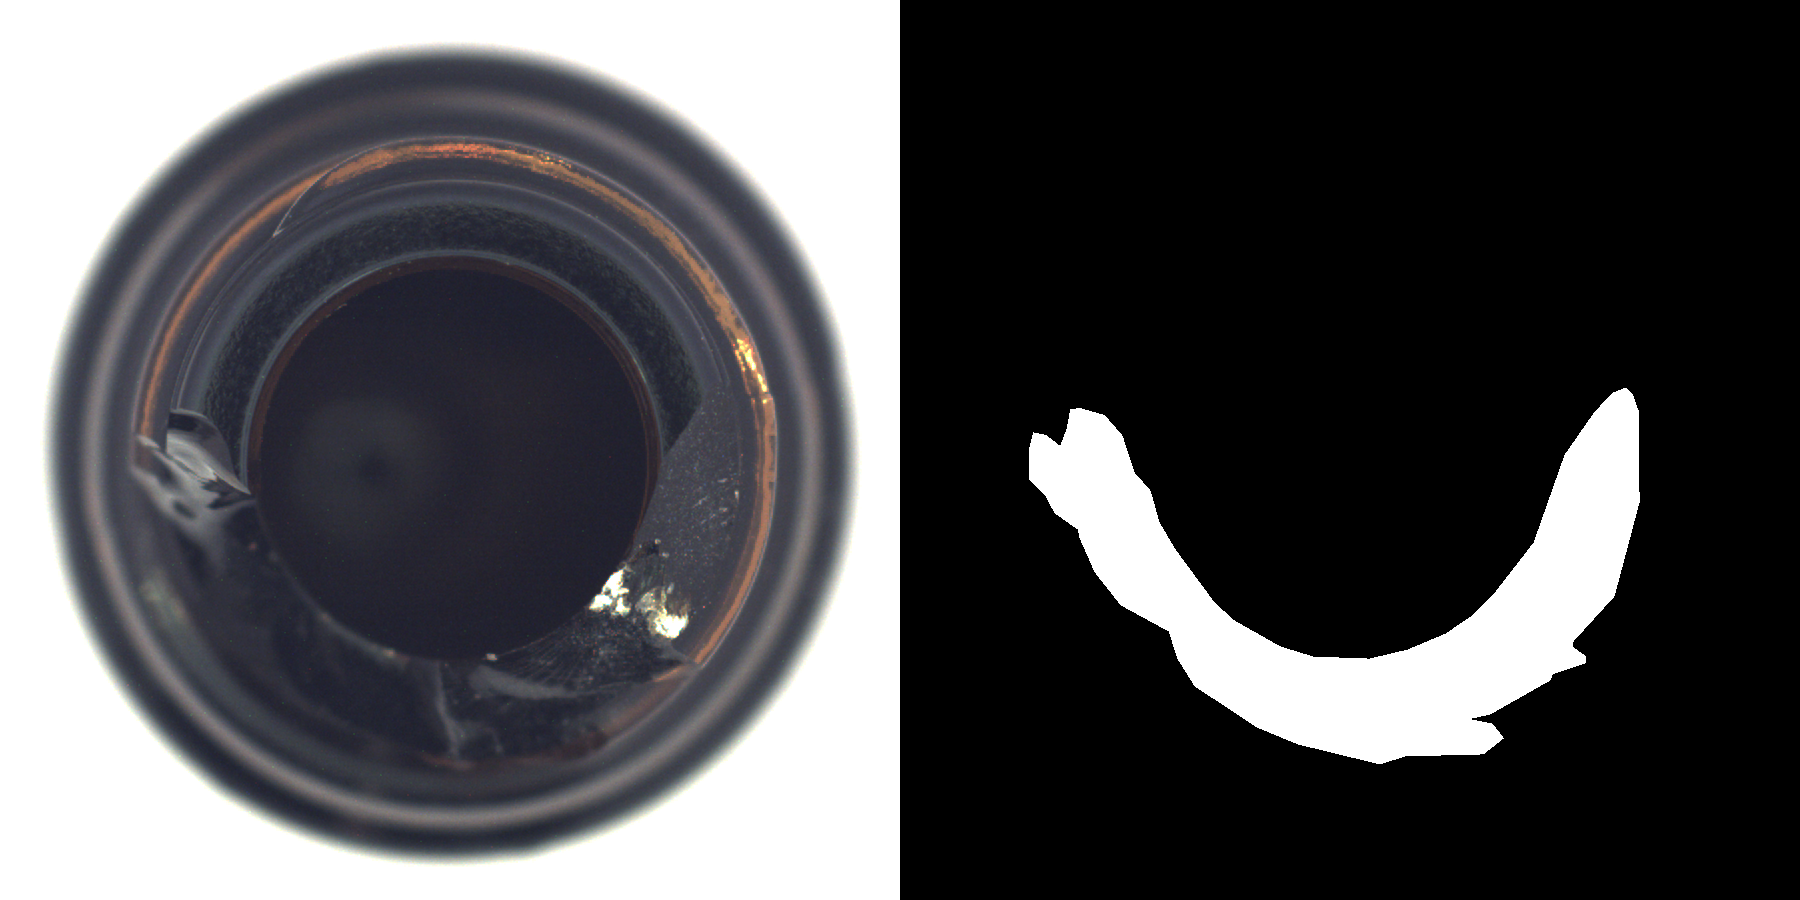

In [18]:
img = to_pil_image(sample.image.clone())
msk = to_pil_image(sample.gt_mask.int() * 255).convert("RGB")

Image.fromarray(np.hstack((np.array(img), np.array(msk))))

In [19]:
!pip install openvino-dev

In [20]:
pip install FrEIA

In [21]:
pip install python-dotenv

In [22]:
pip install open_clip_torch

In [23]:
!pip install anomalib timm --quiet

In [24]:
import anomalib.models as ef

# modülü içinde tanımlı olan tüm alt sınıfları, fonksiyonları, objeleri ve alt modülleri listeler.
print(dir(ef))

['AiVad', 'AnomalibModule', 'Cfa', 'Cflow', 'Csflow', 'Dfkde', 'Dfm', 'DictConfig', 'Draem', 'Dsr', 'EfficientAd', 'Fastflow', 'Fre', 'Ganomaly', 'Namespace', 'OmegaConf', 'Padim', 'Patchcore', 'ReverseDistillation', 'Stfpm', 'Supersimplenet', 'Uflow', 'UnknownModelError', 'VlmAd', 'WinClip', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_get_model_class_by_name', 'components', 'convert_snake_to_pascal_case', 'convert_to_snake_case', 'get_available_models', 'get_model', 'image', 'import_module', 'logger', 'logging', 'video']


In [25]:
from anomalib.models import EfficientAd
from anomalib.data import MVTec
from anomalib.engine import Engine
from lightning.pytorch.callbacks import EarlyStopping, ModelCheckpoint

import numpy as np
from PIL import Image
from pathlib import Path

In [26]:
!pip install --upgrade anomalib

In [27]:
!pip install --upgrade --force-reinstall anomalib

  Using cached anomalib-2.0.0-py3-none-any.whl.metadata (26 kB)
  Using cached omegaconf-2.3.0-py3-none-any.whl.metadata (3.9 kB)
  Using cached rich-14.0.0-py3-none-any.whl.metadata (18 kB)
  Using cached jsonargparse-4.38.0-py3-none-any.whl.metadata (12 kB)
  Using cached docstring_parser-0.16-py3-none-any.whl.metadata (3.0 kB)
  Using cached rich_argparse-1.7.0-py3-none-any.whl.metadata (14 kB)
  Using cached lightning_utilities-0.14.3-py3-none-any.whl.metadata (5.6 kB)
  Using cached PyYAML-6.0.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.1 kB)
  Using cached typeshed_client-2.7.0-py3-none-any.whl.metadata (7.9 kB)
  Using cached antlr4_python3_runtime-4.9.3-py3-none-any.whl
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached pygments-2.19.1-py3-none-any.whl.metadata (2.5 kB)
  Using cached packaging-24.2-py3-none-any.whl.metadata (3.2 kB)
  Using cached setuptools-78.1.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached

In [32]:
model = EfficientAd()

In [33]:
# Eğitim sırasında kullanılacak callback'ler
callbacks = [
    ModelCheckpoint(
        # pixel_AUROC yerine train_loss veya train_loss_epoch gibi bir metrik kullanın
        monitor="train_loss_epoch",
        mode="min"  # train_loss için mode genellikle "min" olur
    ),
    EarlyStopping(
        # pixel_AUROC yerine train_loss veya train_loss_epoch gibi bir metrik kullanın
        monitor="train_loss_epoch",
        mode="min",  # train_loss için mode genellikle "min" olur
        patience=3
    ),
]

In [34]:
# Eğitim motoru
engine = Engine(
    callbacks=callbacks,
    accelerator="auto",
    devices=1,
    logger=False
)


In [35]:
# Trains the model using the dataset
engine.fit(datamodule=datamodule, model=model)

INFO:lightning_fabric.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:lightning_fabric.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:lightning_fabric.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.11/dist-packages/lightning/pytorch/loops/utilities.py:73: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name           | Type             | Params | Mode 
------------------------------------------------------------
0 | pre_processor  | PreProcessor     | 0      | train
1 | post_processor | PostProcessor    | 0      | train
2 | evaluator      | Evaluator        | 0      | train
3 | model          | EfficientAdModel | 8.1 M  | train
------------------------------------------------------------
8.1 M     Trainable params
0       

Training: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(
Calculate teacher channel mean & std: 100%|██████████| 209/209 [00:08<00:00, 23.98it/s]
/usr/local/lib/python3.11/dist-packages/lightning/pytorch/core/module.py:512: You called `self.log('train_st', ..., logger=True)` but have no logger configured. You can enable one by doing `Trainer(logger=ALogger(...))`
/usr/local/lib/python3.11/dist-packages/lightning/pytorch/core/module.py:512: You called `self.log('train_ae', ..., logger=True)` but have no logger configured. You can enable one by doing `Trainer(logger=ALogger(...))`
/usr/local/lib/python3.11/dist-packages/lightning/pytorch/core/module.py:512: You called `self.log('train_stae', ..., logger=True)` but have no

Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:06<00:00,  2.02s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.24s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.23s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.23s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.21s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.31s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.21s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.22s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.23s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.22s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.22s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.23s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.22s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.27s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.24s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.23s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.25s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.30s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.23s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.22s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.22s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.24s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.22s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.24s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.21s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.22s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.21s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.33s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.25s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.25s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.24s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.22s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.23s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.21s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.25s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.26s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.20s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.25s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.23s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.22s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.24s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.23s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.21s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.22s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.24s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.22s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.21s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.21s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.23s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.20s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.26s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.33s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.23s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.25s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.21s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.23s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.20s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.21s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.20s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.23s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.22s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.22s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.22s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.22s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.27s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.19s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.21s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.25s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.23s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.24s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.23s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.23s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.24s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.25s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.32s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.23s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.21s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.23s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.25s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.25s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.24s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.22s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.24s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.21s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.29s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:04<00:00,  1.52s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.22s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.21s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.24s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.23s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:04<00:00,  1.49s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.25s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.28s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.27s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.24s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.24s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.23s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.23s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.23s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:04<00:00,  1.49s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.20s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.24s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.25s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.25s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.22s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.22s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.21s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.29s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.25s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.20s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.29s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:03<00:00,  1.25s/it]


In [36]:
print("Eğitimin maksimum epoch sınırı:", engine.trainer.max_epochs)


Eğitimin maksimum epoch sınırı: 1000


In [38]:
# Eğitim sürecinde maksimum kaç epoch çalıştırılacağı
print("🔢 Maksimum Epoch Sayısı (max_epochs):", engine.trainer.max_epochs)

# Eğitim sürecinde en az kaç epoch çalıştırılacağı
print("🔢 Minimum Epoch Sayısı (min_epochs):", engine.trainer.min_epochs)

# Şu anda eğitim hangi epoch'ta? (0'dan başlar)
print("📍 Şu Anki Epoch (current_epoch):", engine.trainer.current_epoch)

# Eğitimde hangi hızlandırıcı (GPU, CPU, MPS) kullanılıyor?
print("⚡ Kullanılan Hızlandırıcı (accelerator):", engine.trainer.accelerator.__class__.__name__)

# Kullanılan cihaz sayısı (örneğin 1 GPU veya CPU)
print("🖥️ Cihaz Sayısı (devices):", engine.trainer.num_devices)

# Validation (doğrulama) işlemi her ne sıklıkla yapılacak?
# 1.0: Her epoch sonunda, 0.5: Yarım epoch'ta bir
print("🔁 Validation Sıklığı (val_check_interval):", engine.trainer.val_check_interval)

# Eğitim verisinin ne kadarı kullanılacak?
# 1.0: %100'ü, 0.5: %50’si
print("📦 Eğitim Verisi Kullanım Oranı (limit_train_batches):", engine.trainer.limit_train_batches)

# Validation verisinin ne kadarı kullanılacak?
# 1.0: %100'ü, 0.2: %20’si
print("📦 Validation Verisi Kullanım Oranı (limit_val_batches):", engine.trainer.limit_val_batches)

# Kaç adımda bir log (çıktı) yazılsın?
print("📝 Loglama Aralığı (log_every_n_steps):", engine.trainer.log_every_n_steps)


🔢 Maksimum Epoch Sayısı (max_epochs): 1000
🔢 Minimum Epoch Sayısı (min_epochs): 0
📍 Şu Anki Epoch (current_epoch): 157
⚡ Kullanılan Hızlandırıcı (accelerator): CUDAAccelerator
🖥️ Cihaz Sayısı (devices): 1
🔁 Validation Sıklığı (val_check_interval): 1.0
📦 Eğitim Verisi Kullanım Oranı (limit_train_batches): 1.0
📦 Validation Verisi Kullanım Oranı (limit_val_batches): 1.0
📝 Loglama Aralığı (log_every_n_steps): 50


In [39]:
engine.test(datamodule=datamodule, model=model)

INFO:pytorch_lightning.utilities.rank_zero:The following callbacks returned in `LightningModule.configure_callbacks` will override existing callbacks passed to Trainer: Evaluator, ImageVisualizer, PostProcessor, PreProcessor
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        image_AUROC        │            1.0            │
│       image_F1Score       │    0.9919999837875366     │
│        pixel_AUROC        │    0.9836041927337646     │
│       pixel_F1Score       │    0.7917670011520386     │
└───────────────────────────┴───────────────────────────┘

[{'image_AUROC': 1.0,
  'image_F1Score': 0.9919999837875366,
  'pixel_AUROC': 0.9836041927337646,
  'pixel_F1Score': 0.7917670011520386}]

In [51]:
data_path = dataset_root / "bottle/test/broken_large/001.png"
predictions = engine.predict(model=model, data_path=data_path)
prediction = predictions[0]  # Get the first and only prediction

INFO:pytorch_lightning.utilities.rank_zero:The following callbacks returned in `LightningModule.configure_callbacks` will override existing callbacks passed to Trainer: Evaluator, ImageVisualizer, PostProcessor, PreProcessor
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

In [52]:
print(
    f"Image Shape: {prediction.image.shape},\n"
    f"Anomaly Map Shape: {prediction.anomaly_map.shape}, \n"
    f"Predicted Mask Shape: {prediction.pred_mask.shape}",
)

Image Shape: torch.Size([1, 3, 256, 256]),
Anomaly Map Shape: torch.Size([1, 256, 256]), 
Predicted Mask Shape: torch.Size([1, 256, 256])


In [53]:
image_path = prediction.image_path[0]
image_size = prediction.image.shape[-2:]
image = np.array(Image.open(image_path).resize(image_size))

In [54]:
pred_score = prediction.pred_score[0]
pred_labels = prediction.pred_label[0]
print(pred_score, pred_labels)

tensor([0.5125]) tensor(True)


In [44]:
from anomalib.deploy import ExportType, OpenVINOInferencer

In [45]:
pip install onnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 80.6 MB/s eta 0:00:00


In [55]:
engine.export(
    model=model,
    export_type=ExportType.OPENVINO,
)

PosixPath('/content/results/EfficientAd/MVTecAD/bottle/latest/weights/openvino/model.xml')

In [47]:
import matplotlib.pyplot as plt

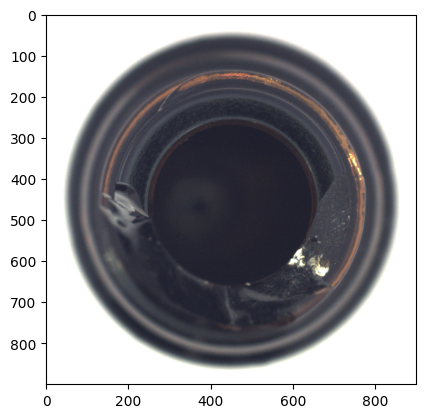

In [56]:
from anomalib.data.utils import read_image

image_path = prediction.image_path[0]
image = read_image(path=image_path)
plt.imshow(image)

In [57]:
# Checking the Model Save Path
output_path = Path(engine.trainer.default_root_dir)
print(output_path)

/content/results/EfficientAd/MVTecAD/bottle/latest


In [58]:
# Verifying the Existence of the OpenVINO Model
openvino_model_path = output_path / "weights" / "openvino" / "model.bin"
print(openvino_model_path.exists())


True


In [59]:
import time


# Zamanlamayı başlat
start_time = time.time()

# Loading the OpenVINO Model and runs it on an Intel processor
inferencer = OpenVINOInferencer(
    path=openvino_model_path,  # Path to the OpenVINO IR model.
    device="CPU",  # We would like to run it on an Intel CPU.
)

# Zamanı ölç
model_loading_time = time.time() - start_time
print(f"Model loading time: {model_loading_time:.2f} seconds")

Model loading time: 0.72 seconds


In [60]:
from anomalib.utils.visualization import ImageResult

# Performing Inference (çıkarım yapma) on an Image Using the Model
start_time = time.time()
predictions = inferencer.predict(image=image_path)

# Zamanı ölç
inference_time = time.time() - start_time
print(f"Inference time: {inference_time:.2f} seconds")

# 3. Çıktıları görselleştirme
start_time = time.time()

# Converting the Output for Visualization
predictions = ImageResult.from_dataset_item(predictions.items[0])  # convert to imageresult for visualization


# Zamanı ölç
visualization_time = time.time() - start_time
print(f"Visualization time: {visualization_time:.2f} seconds")

# Toplam süre
total_time = model_loading_time + inference_time + visualization_time
print(f"Total time: {total_time:.2f} seconds")

Inference time: 0.75 seconds
Visualization time: 0.12 seconds
Total time: 1.59 seconds


In [61]:
# Printing the Model Output
print(predictions.pred_score, predictions.pred_label)

0.51591766 True


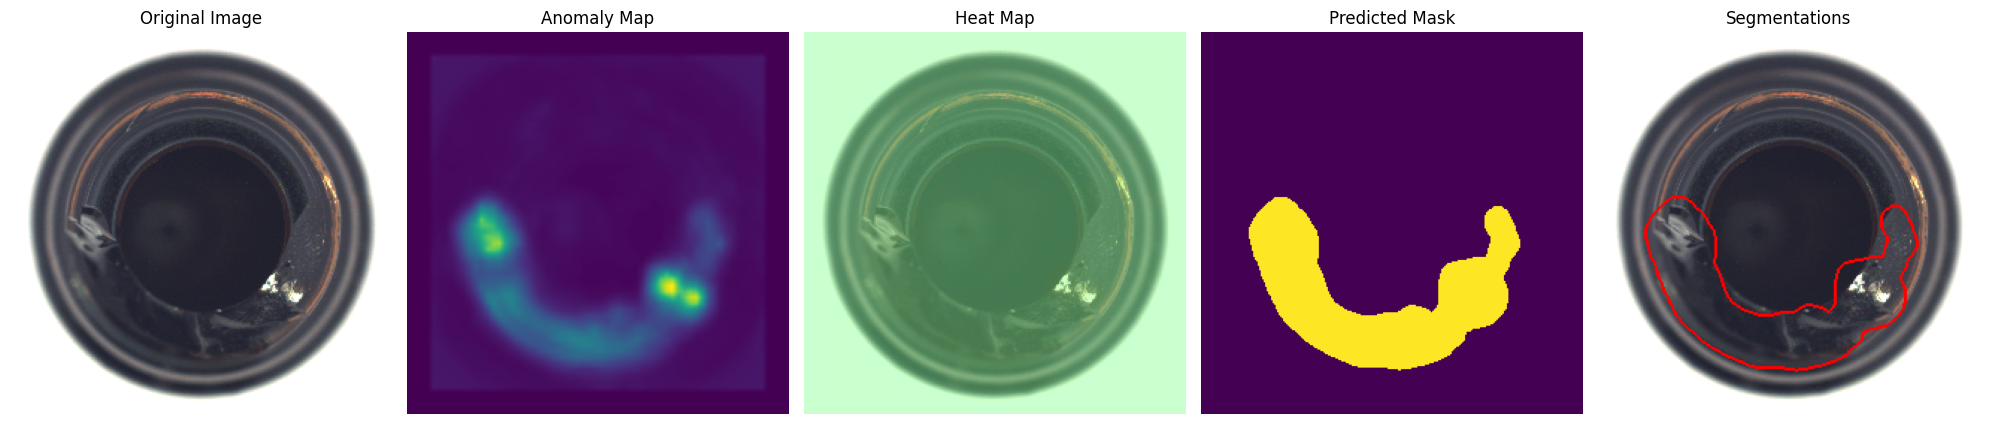

In [62]:
# Görselleri aynı figürde yan yana göstermek için subplot kullanıyoruz.
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

# Orijinal görüntü
axes[0].imshow(predictions.image)
axes[0].set_title("Original Image")

# Modelin tahmin ettiği ham anomali haritası
axes[1].imshow(predictions.anomaly_map)
axes[1].set_title("Anomaly Map")

# Isı haritası (Ham anomali haritası, orijinal görüntüyle birleştirilmiş hali)
axes[2].imshow(predictions.heat_map)
axes[2].set_title("Heat Map")

# Segmentasyon maskesi (Modelin belirlediği anomali bölgeleri)
axes[3].imshow(predictions.pred_mask)
axes[3].set_title("Predicted Mask")

# Segmentasyon maskesi ile orijinal görüntüyü birleştirilmiş hali
axes[4].imshow(predictions.segmentations)
axes[4].set_title("Segmentations")

# Eksensiz gösterim
for ax in axes:
    ax.axis("off")

# Görselleri göster
plt.tight_layout()
plt.show()
